<a href="https://colab.research.google.com/github/gmldnjs03/basic-statistics-programing/blob/main/subway_moving_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def mov_avg_filter(x_n, x_meas):
   
    n = len(x_n)
    for i in range(n-1):
        x_n[i] = x_n[i+1]
    x_n[n-1] = x_meas
    x_avg = np.mean(x_n)
    return x_avg, x_n

In [2]:
data=pd.read_csv('/content/서울시 지하철호선별 역별 승하차 인원 정보.csv',sep=',')

In [4]:
def get_subway(i):
    z = data['subway_geton'][i] 
    return z

In [5]:
len(data)

23636

In [6]:
n = 10
n_samples = 23636
time_end = 10

In [7]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [8]:
for i in range(n_samples):
    x_meas = get_subway(i)
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)
 
    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

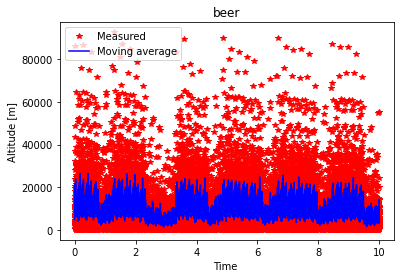

In [9]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Moving average')
plt.legend(loc='upper left')
plt.title('beer')
plt.xlabel('Time ')
plt.ylabel('Altitude [m]')
plt.show()
